In [1]:
import jax
import numpy as np
import jax.numpy as jnp
from functools import partial
from jax import jacfwd, jacrev
import matplotlib.pyplot as plt
import jax.scipy.linalg as jlinalg

jax.config.update("jax_enable_x64", True)
from parsmooth import MVNStandard
from parsmooth import FunctionalModel
from parsmooth._utils import none_or_shift
from parsmooth.sequential._filtering import filtering
from parsmooth.linearization import extended, extended_hessian
from parsmooth.sequential._filtering_Newton import filtering as newton_filtering

In [2]:
def dynamic_model(xk):
    return jnp.tanh(xk)
def measurement_model(xk):
    return jnp.sin(xk)

In [3]:
# Get data
T = 4
xs = np.zeros((T, 1))
ys = np.zeros((T, 1))
sigma = 0.1
x0 = np.random.normal(loc=0, scale=1)
x = x0
xs[0] = x
for k in range(T):
    q = np.random.normal(loc=0, scale=sigma)
    r = np.random.normal(loc=0, scale=sigma)
    x = dynamic_model(x) + q
    y = measurement_model(x) + r
    xs[k] = x
    ys[k] = y

2023-01-17 15:57:05.435158: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:05.571330: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:05.675709: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to 

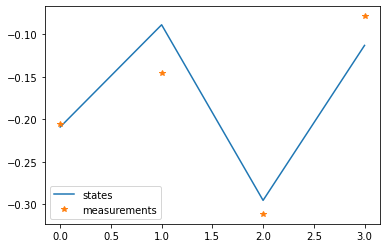

In [4]:
plt.figure()
plt.plot(xs)
plt.plot(ys, '*')
plt.legend(['states', 'measurements']);

In [5]:
Q = jnp.array([[sigma**2]])
R = jnp.array([[sigma**2]])
initial_states =  MVNStandard(jnp.repeat(jnp.array([[1.]]),T + 1, axis=0),
                                                     jnp.repeat(jnp.eye(1).reshape(1, 1, 1), T + 1, axis=0))
transition_model = FunctionalModel(partial(dynamic_model), MVNStandard(jnp.zeros((1,)), Q))
observation_model = FunctionalModel(partial(measurement_model), MVNStandard(jnp.zeros((1,)), R))

2023-01-17 15:57:06.041605: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:06.102937: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:06.148131: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to 

In [6]:
# Filtering - Gauss-Newton
m0 = dynamic_model(xs[0])
P0 = Q
init = MVNStandard(m0, P0)

xf = filtering(ys, init, transition_model, observation_model, extended, initial_states)


2023-01-17 15:57:06.552300: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:07.307841: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:07.308844: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to 

In [7]:
# Filtering - Newton
filtered_states_newton = newton_filtering(ys, init, transition_model, observation_model, extended_hessian, initial_states)

2023-01-17 15:57:07.830073: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:07.831989: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:07.832033: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to 

2023-01-17 15:57:07.967753: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:08.033075: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:08.105560: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to 

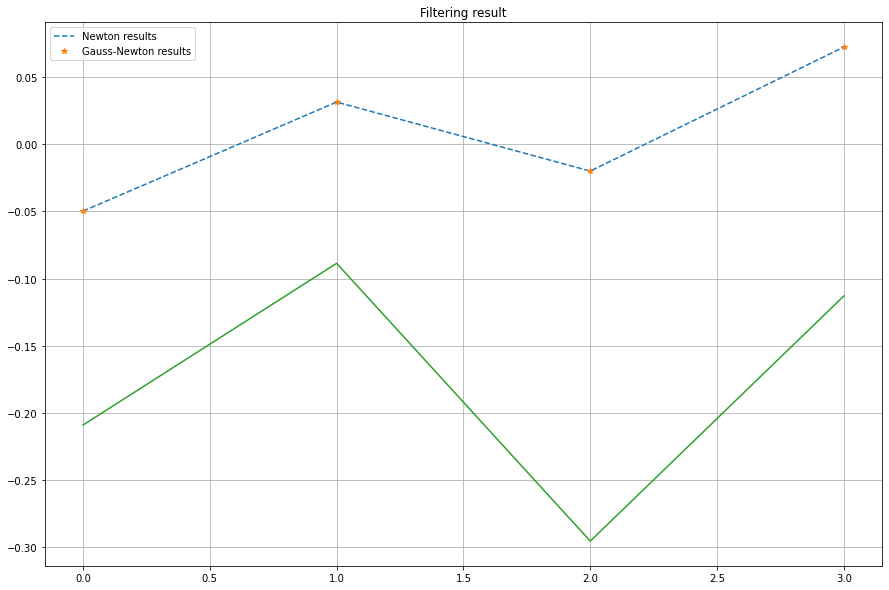

In [8]:
plt.figure(figsize=(15,10))
plt.plot(filtered_states_newton.mean[1:], "--", label="Newton results" )
plt.plot(xf.mean[1:], "*", label = "Gauss-Newton results")
plt.plot(xs)
plt.title("Filtering result")
plt.grid()
plt.legend();

In [9]:
filtered_states_newton.mean.shape

(5, 1)

# Batch solution

In [10]:
def mvn_loglikelihood(x, chol_cov):
    """multivariate normal"""
    dim = chol_cov.shape[0]
    y = jlinalg.solve_triangular(chol_cov, x, lower=True)
    normalizing_constant = (
            jnp.sum(jnp.log(jnp.abs(jnp.diag(chol_cov)))) + dim * jnp.log(2 * jnp.pi) / 2.0
    )
    norm_y = jnp.sum(y * y, -1)
    return -0.5 * norm_y - normalizing_constant

In [11]:
def L(predict_trajectory, update_trajectory, z, measurement_fun, dynamic_fun, chol_Q, chol_R):
    mp_nominal = predict_trajectory
    mu_nominal = update_trajectory
    # important: f(x0) = m_0
    cost = mvn_loglikelihood(mu_nominal - dynamic_fun(mp_nominal), chol_Q) + mvn_loglikelihood(z - measurement_fun(mu_nominal), chol_R)
    return -cost


In [12]:
def lost_function(x):
    predict_traj = none_or_shift(x, -1)
    update_traj = none_or_shift(x, 1)
    vmapped_fun = jax.vmap(L, in_axes=[0, 0, 0, None, None, None, None])
    return jnp.sum(vmapped_fun(predict_traj, update_traj, ys, measurement_model, dynamic_model, jnp.linalg.cholesky(Q), jnp.linalg.cholesky(R)))


In [13]:
grad = jacfwd(lost_function)(initial_states.mean)
Hess = jacfwd(jacrev(lost_function))(initial_states.mean)
nx = initial_states.mean.shape[0]
x_batch = initial_states.mean - jnp.linalg.inv(jax.numpy.reshape(Hess, (nx,nx))) @ grad

2023-01-17 15:57:08.604816: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:08.658415: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2023-01-17 15:57:08.705174: W external/org_tensorflow/tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to 

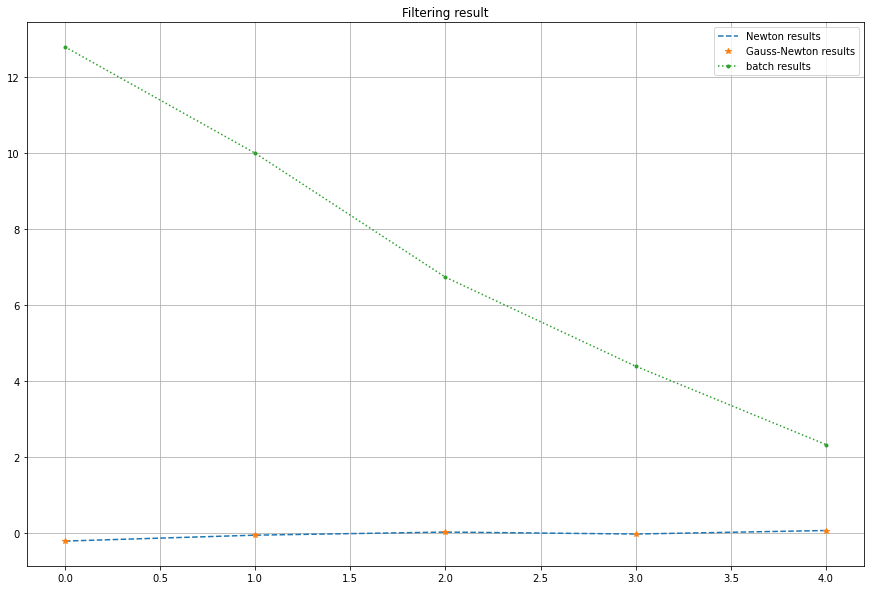

In [21]:
plt.figure(figsize=(15,10))
plt.plot(filtered_states_newton.mean, "--", label="Newton results" )
plt.plot(xf.mean, "*", label = "Gauss-Newton results")
plt.plot(x_batch, ".:", label = "batch results")
plt.title("Filtering result")
plt.grid()
plt.legend();

In [19]:
jax.numpy.reshape(Hess, (nx,nx))

DeviceArray([[ 32.88866681, -41.99743416,   0.        ,   0.        ,
                0.        ],
             [-41.99743416,  74.00870264, -41.99743416,   0.        ,
                0.        ],
             [  0.        , -41.99743416,  79.03606369, -41.99743416,
                0.        ],
             [  0.        ,   0.        , -41.99743416,  65.07014218,
              -41.99743416],
             [  0.        ,   0.        ,   0.        , -41.99743416,
               51.7763048 ]], dtype=float64)

In [15]:
# checking the hessian and gradient for T = 4

In [25]:
def dynamic_model(xk):
    return jnp.tanh(xk)

def measurement_model(xk):
    return jnp.sin(xk)

def d_dynamic_model(xk):
    return 1. - (jnp.tanh(xk))**2

def d_measurement_model(x_k):
    return jnp.cos(x_k)

def dd_dynamic_model(xk):
    return -2 * (1 - (jnp.tanh(xk))**2) * jnp.tanh(xk)

def dd_measurement_model(xk):
    return -jnp.sin(xk)
